In [1]:
import numpy as np

class MDP:
    def __init__(self):
        self.states = ['s0', 's1', 's2']
        self.actions = ['a0', 'a1']

        # Transition probabilities (next_state, probability)
        self.transitions = {
            's0': {
                'a0': [('s1', 0.8), ('s2', 0.2)],
                'a1': [('s0', 1.0)]
            },
            's1': {
                'a0': [('s0', 0.5), ('s2', 0.5)],
                'a1': [('s1', 1.0)]
            },
            's2': {
                'a0': [('s0', 1.0)]
            }
        }

        # Rewards for each (state, action, next_state) pair
        self.rewards = {
            ('s0', 'a0', 's1'): 5,
            ('s0', 'a0', 's2'): 10,
            ('s0', 'a1', 's0'): 1,
            ('s1', 'a0', 's0'): 3,
            ('s1', 'a0', 's2'): 2,
            ('s1', 'a1', 's1'): 0,
            ('s2', 'a0', 's0'): 4,
        }


In [2]:
class MDPWithJointProbability(MDP):
    def __init__(self):
        super().__init__()

    def calculate_joint_probability(self, state, action):
        joint_probabilities = []
        if state in self.transitions and action in self.transitions[state]:
            for next_state, transition_prob in self.transitions[state][action]:
                reward = self.rewards.get((state, action, next_state), None)
                if reward is not None:
                    joint_prob = (next_state, reward, transition_prob)
                    joint_probabilities.append(joint_prob)
        return joint_probabilities

# Create MDP instance with joint probability calculation
mdp_joint_prob = MDPWithJointProbability()

# Example usage
state = 's0'
action = 'a0'
joint_probabilities = mdp_joint_prob.calculate_joint_probability(state, action)

# Display joint probabilities
for next_state, reward, prob in joint_probabilities:
    print(f"Joint Probability: P(S'={next_state}, R={reward} | S={state}, A={action}) = {prob}")


Joint Probability: P(S'=s1, R=5 | S=s0, A=a0) = 0.8
Joint Probability: P(S'=s2, R=10 | S=s0, A=a0) = 0.2


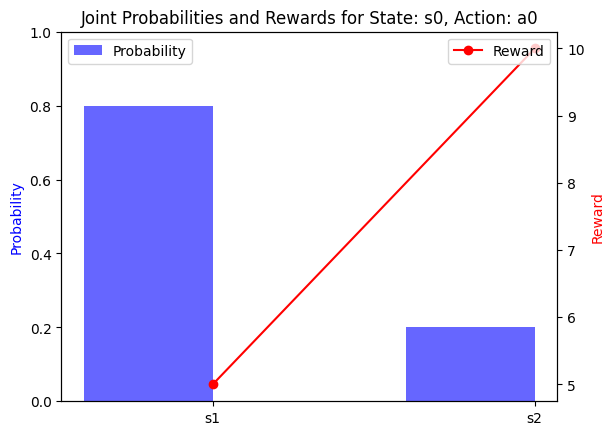

In [3]:
import matplotlib.pyplot as plt

def plot_joint_probabilities(joint_probabilities, state, action):
    next_states = []
    rewards = []
    probabilities = []

    for next_state, reward, prob in joint_probabilities:
        next_states.append(next_state)
        rewards.append(reward)
        probabilities.append(prob)

    x = np.arange(len(next_states))

    fig, ax1 = plt.subplots()

    # Bar chart for probabilities
    ax1.bar(x - 0.2, probabilities, 0.4, label='Probability', color='b', alpha=0.6)
    ax1.set_ylabel('Probability', color='b')
    ax1.set_ylim(0, 1)
    ax1.set_xticks(x)
    ax1.set_xticklabels(next_states)

    # Line chart for rewards
    ax2 = ax1.twinx()
    ax2.plot(x, rewards, color='r', marker='o', label='Reward')
    ax2.set_ylabel('Reward', color='r')

    ax1.set_title(f'Joint Probabilities and Rewards for State: {state}, Action: {action}')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.show()

# Example usage
joint_probabilities = mdp_joint_prob.calculate_joint_probability('s0', 'a0')
plot_joint_probabilities(joint_probabilities, 's0', 'a0')
